# Obraz binarny
Wygeneruj losowy obraz binarny o rozmiarze n×n i wybranej gęstości δ czarnych punk-  
tów δ = 0.1,0.3,0.4. Korzystając z różnego typu sąsiedztwa (4-sąsiadów, 8-sąsiadów,  
8-16-sąsiadów) zaproponuj funkcję energii (np. w bliskiej odległości te same kolory przy-  
ciągają się, a w dalszej odpychają się) i dokonaj jej minimalizacji za pomocą algorytmu  
symulowanego wyżarzania. W jaki sposób można generować stany sąsiednie? Jak róż-  
nią się uzyskane wyniki w zależności od rodzaju sąsiedztwa, wybranej funkcji energii i  
szybkości spadku temperatury?

In [53]:
import matplotlib.pyplot as plt
import random
import math
from copy import deepcopy

### Funkcje rysujące obrazy binarne i wykresy temperatur

In [54]:
def plot_binary_image(image, size=3):
    fig = plt.figure(figsize=(size, size))
    ax = fig.add_subplot()
    ax.matshow(image, cmap='gray', aspect="auto")
    plt.show()

def plot_costs(costs):
    plt.plot(costs)
    plt.show()

### Funkcje pomocnicze 

In [55]:
def accept_prob(old_cost, new_cost, temp):
    if new_cost < old_cost:
        return 1.0
    else:
        return math.exp(-abs((old_cost - new_cost)) / temp)
    
def total_cost(bin_image, cost_function):
    return sum([cost_function(bin_image, i, j) for i in range(len(bin_image)) for j in range(len(bin_image))])

## Funkcje energii

In [78]:
def energy_4_neighbours(bin_image, i, j):
    n = len(bin_image)
    value = bin_image[i][j]
    neighbours = [((i-1)%n,(j)%n), ((i+1)%n,(j)%n), ((i)%n,(j-1)%n), ((i)%n,(j+1)%n)]
    return sum([1 for x, y in neighbours if bin_image[x][y] == value])

def energy_8_neighbours(bin_image, i, j):
    n = len(bin_image)
    value = bin_image[i][j]
    neighbours = [  ((i-1)%n,(j)%n), ((i+1)%n,(j)%n), ((i)%n,(j-1)%n), ((i)%n,(j+1)%n),
                    ((i-1)%n,(j-1)%n), ((i+1)%n,(j-1)%n), ((i-1)%n,(j+1)%n), ((i+1)%n,(j+1)%n)  ]
    return sum([1 for x, y in neighbours if bin_image[x][y] == value])

def energy_4_vertical_neighbours(bin_image, i, j):
    n = len(bin_image)
    val = bin_image[i][j]
    values = [bin_image[(x + i) % n][j] for x in range(-4, 4) if x != 0]
    return sum([1 for x in values if x != val])

## Wyżarzanie

In [80]:
def cost_of_swap(bin_image, cost_function, neighbours):
    n = len(bin_image)
    x = random.randint(0,n-1), random.randint(0,n-1)
    y = random.randint(0,n-1), random.randint(0,n-1)

    points = {((x[0] + i) % n, (x[1] + j) % n) for i,j in neighbours + [(0,0)]} | {((y[0] + i) % n, (y[1] + j) % n) for i,j in neighbours + [(0,0)]}
    
    old_cost = sum([cost_function(bin_image, point[0], point[1]) for point in points])
    bin_image[x[0]][x[1]], bin_image[y[0]][y[1]] = bin_image[y[0]][y[1]], bin_image[x[0]][x[1]]
    new_cost = sum([cost_function(bin_image, point[0], point[1]) for point in points])
    bin_image[x[0]][x[1]], bin_image[y[0]][y[1]] = bin_image[y[0]][y[1]], bin_image[x[0]][x[1]]
    
    return x,y, new_cost - old_cost

def simulated_annealing(bin_image, energy_function, neighbours, cooling_rate=0.999, T=10000, min_temp=1e-8):
    costs = []
    best_res = deepcopy(bin_image)
    curr_cost = total_cost(bin_image, energy_function)
    best_cost = curr_cost
    
    i = 0
    while T > min_temp and i < 2000:
        T = T * cooling_rate
        x, y, change_cost = cost_of_swap(bin_image, energy_function, neighbours)
        if accept_prob(curr_cost, curr_cost + change_cost, T) > random.random():
            if change_cost != 0:
                i = 0
            bin_image[x[0]][x[1]], bin_image[y[0]][y[1]] = bin_image[y[0]][y[1]], bin_image[x[0]][x[1]]
            curr_cost += change_cost

            if curr_cost < best_cost:
                best_res = deepcopy(bin_image)
                best_cost = curr_cost
        else:
            i += 1
        costs.append(curr_cost)
    return best_res, costs


### Testy

In [58]:
def generate_bin_image(n, density=0.5):
    return [[0 if random.random() < density else 1 for j in range(n)] for i in range(n)]

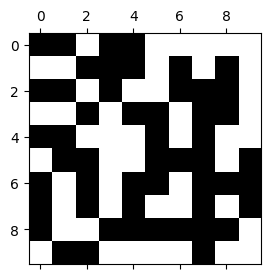

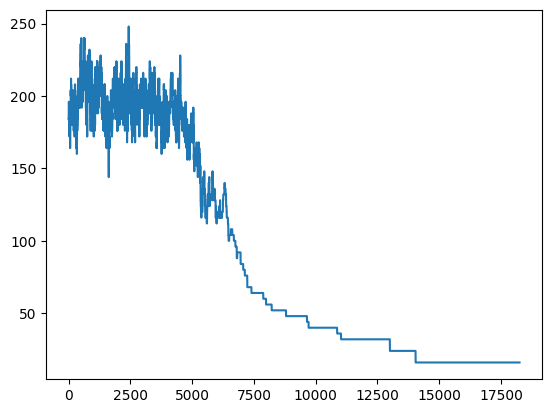

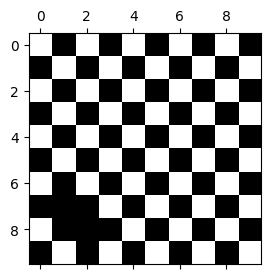

In [59]:
bin_image = generate_bin_image(10)
plot_binary_image(bin_image)
best, costs = simulated_annealing(bin_image, energy_4_neighbours, [(-1,0), (1,0), (0,-1), (0,1)], T=1000, min_temp=1e-8)
plot_costs(costs)
plot_binary_image(best)

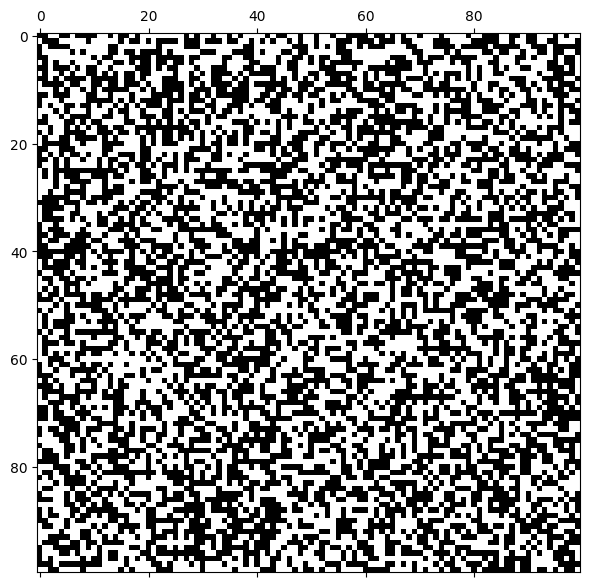

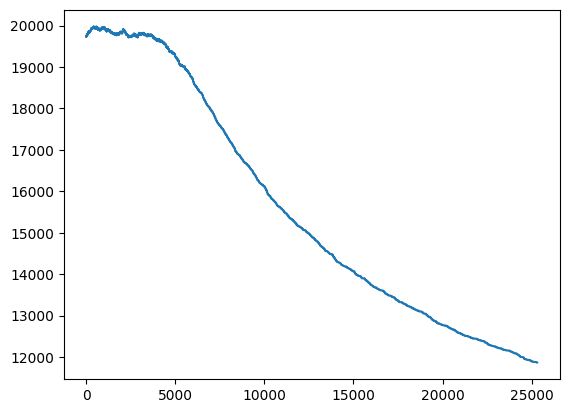

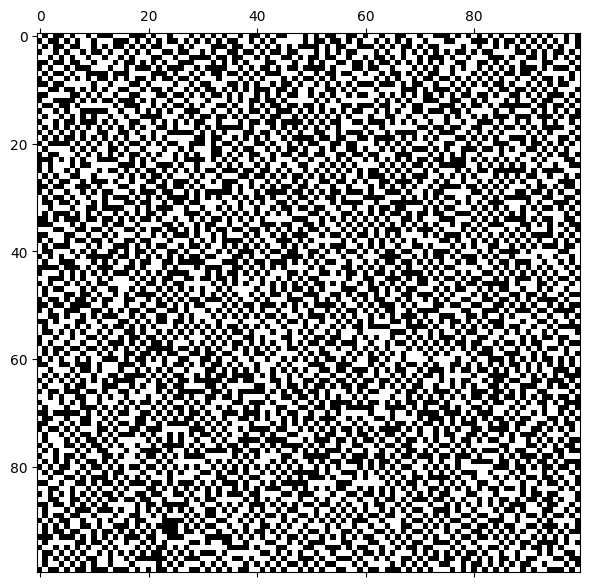

In [60]:
bin_image = generate_bin_image(100)
plot_binary_image(bin_image, 7)
best, costs = simulated_annealing(bin_image, energy_4_neighbours, [(-1,0), (1,0), (0,-1), (0,1)], T=1000, min_temp=1e-8)
plot_costs(costs)
plot_binary_image(best, 7)

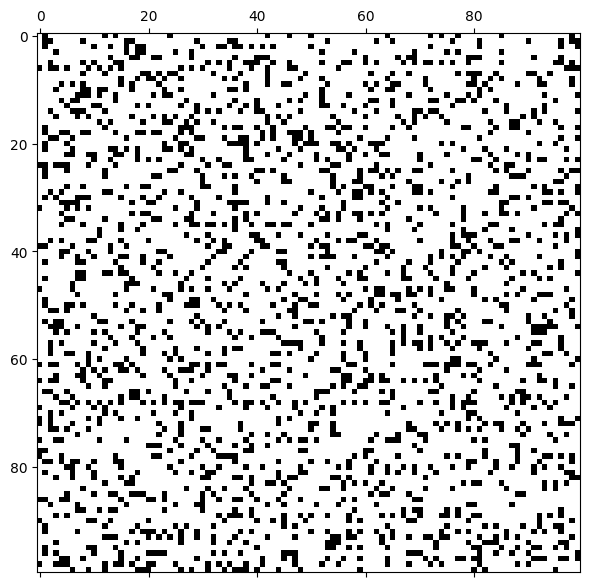

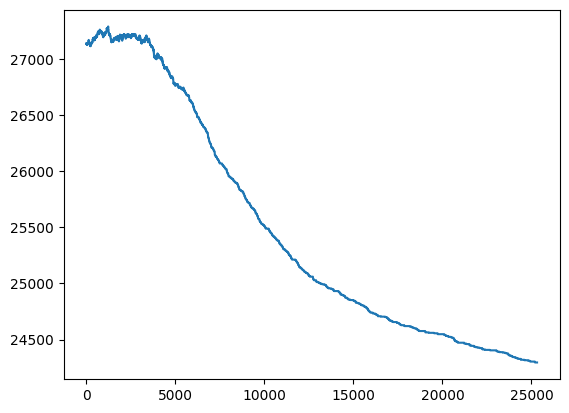

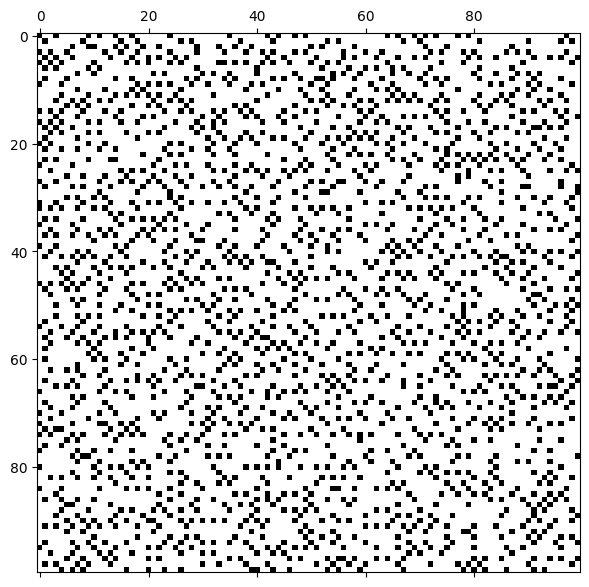

In [61]:
bin_image = generate_bin_image(100, 0.2)
plot_binary_image(bin_image, size=7)
best, costs = simulated_annealing(bin_image, energy_4_neighbours, [(-1,0), (1,0), (0,-1), (0,1)], T=1000, min_temp=1e-8)
plot_costs(costs)
plot_binary_image(best, 7)

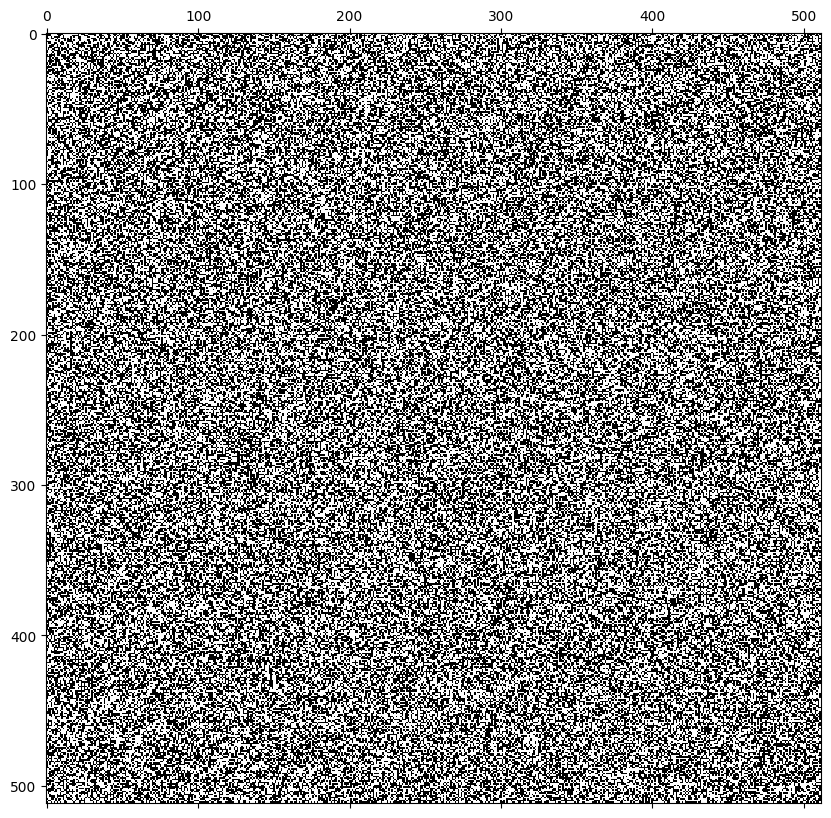

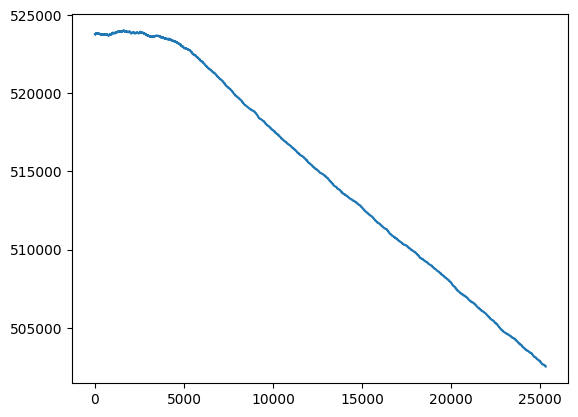

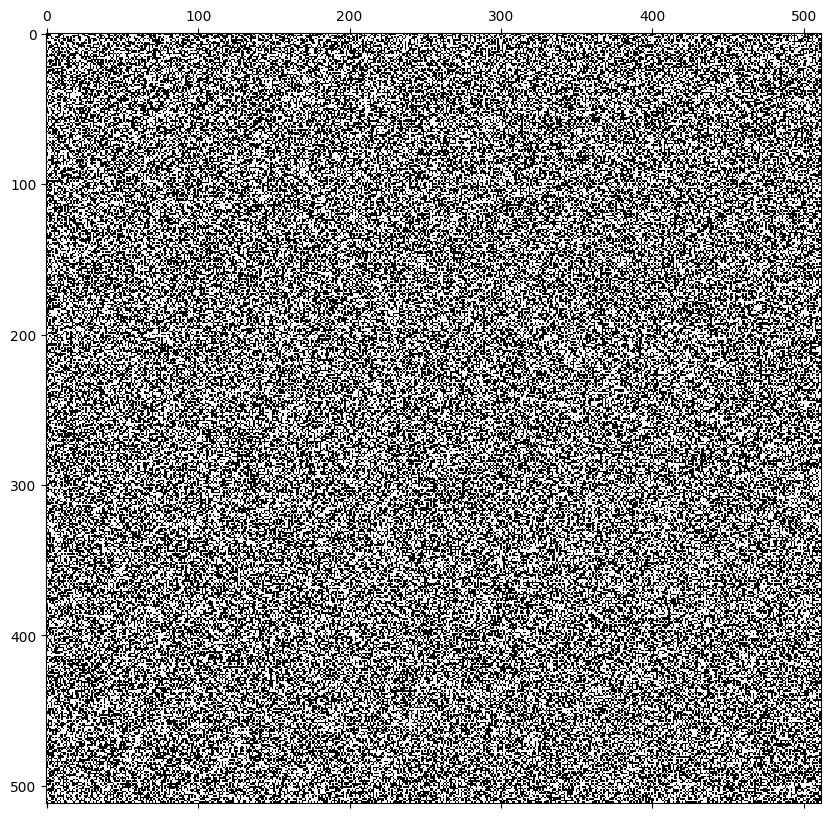

In [62]:
bin_image = generate_bin_image(512)
plot_binary_image(bin_image, 10)
best, costs = simulated_annealing(bin_image, energy_4_neighbours, [(-1,0), (1,0), (0,-1), (0,1)], T=1000, min_temp=1e-8)
plot_costs(costs)
plot_binary_image(best, 10)

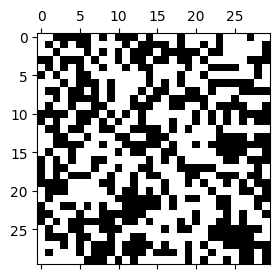

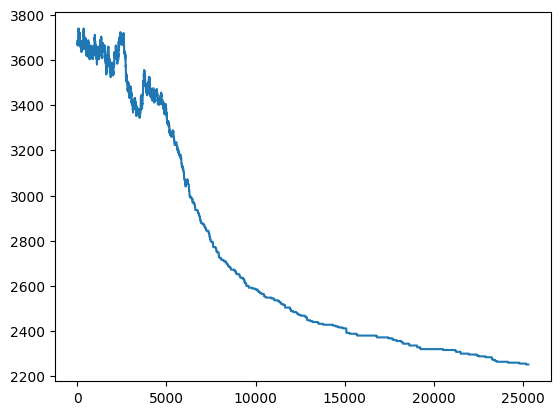

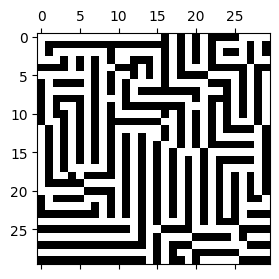

In [63]:
bin_image = generate_bin_image(30)
plot_binary_image(bin_image)
best, costs = simulated_annealing(bin_image, energy_8_neighbours, [(-1,0), (1,0), (0,-1), (0,1), (-1,-1), (1,-1), (-1,1), (1,1)], T=1000, min_temp=1e-8)
plot_costs(costs)
plot_binary_image(best)

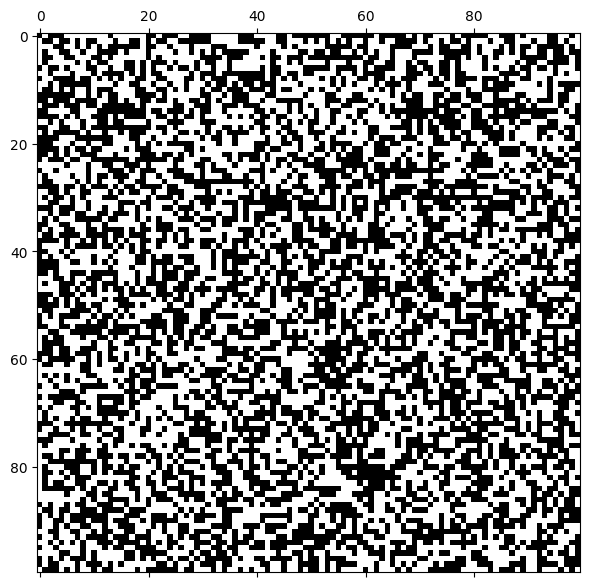

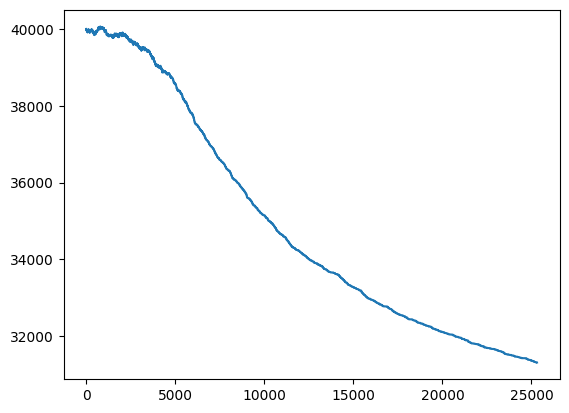

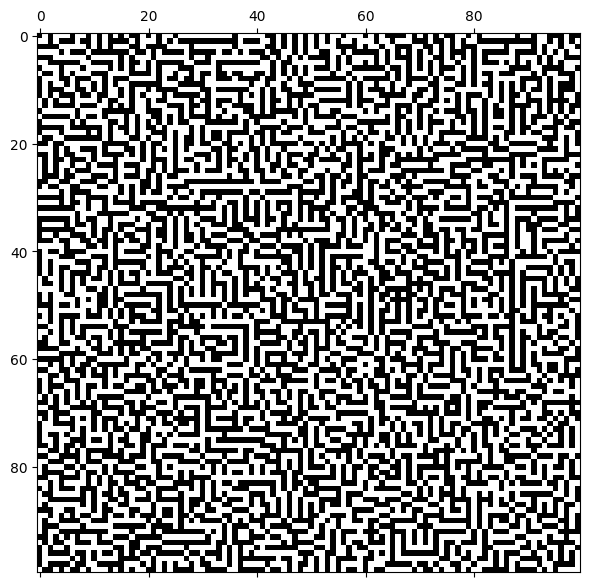

In [64]:
bin_image = generate_bin_image(100)
plot_binary_image(bin_image, 7)
best, costs = simulated_annealing(bin_image, energy_8_neighbours, [(-1,0), (1,0), (0,-1), (0,1), (-1,-1), (1,-1), (-1,1), (1,1)], T=1000, min_temp=1e-8)
plot_costs(costs)
plot_binary_image(best, 7)

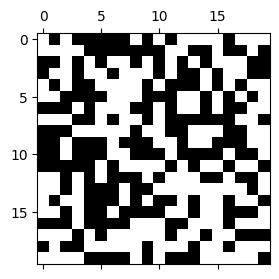

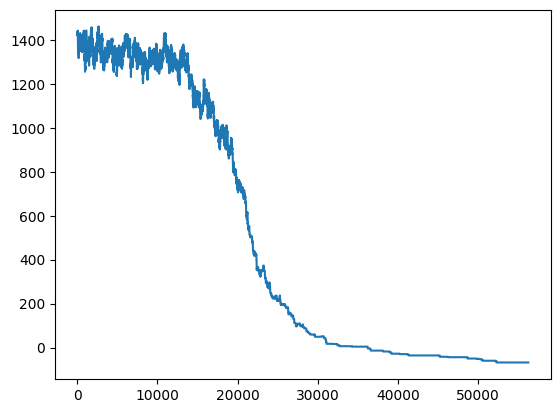

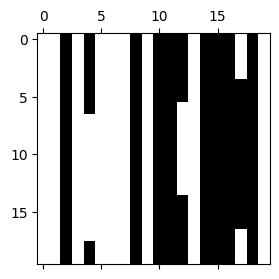

In [77]:
bin_image = generate_bin_image(20)
plot_binary_image(bin_image, size=3)
best, costs = simulated_annealing(bin_image, energy_4_vertical_neighbours, [(x,0) for x in range(-4,4) if x != 0], cooling_rate=0.99985, T=100, min_temp=1e-8)
plot_costs(costs)
plot_binary_image(best, size=3)

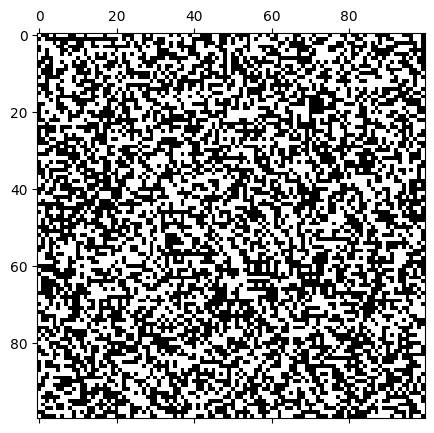

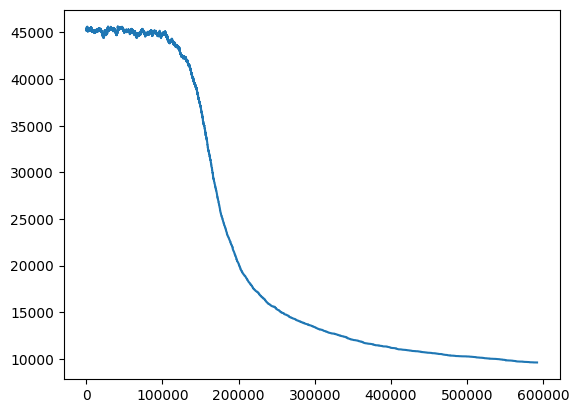

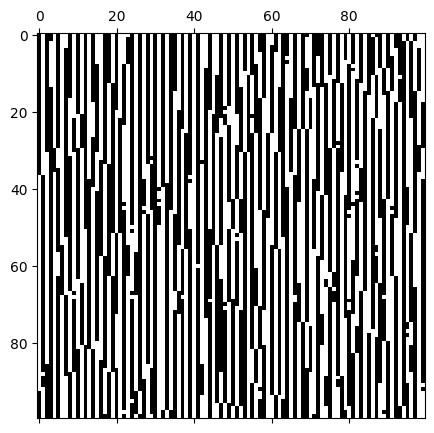

In [66]:
bin_image = generate_bin_image(100)
plot_binary_image(bin_image, 5)
best, costs = simulated_annealing(bin_image, energy_4_vertical_neighbours, [(x,0) for x in range(-4,4) if x != 0], cooling_rate=0.99995, T=10000, min_temp=1e-10)
plot_costs(costs)
plot_binary_image(best, 5)

Po dwóch godzinach czekania na wynik algorytmu dla pionowych linii poddałem się i poszedłem spać

## Podsumowanie
W zależności od tego jak określimy sąsiedztwo (4 punkty, 8 punktów lub punkty w pionowej linii) otrzymujemy różne symulacje rozkładu energii.
Wielokrotnie temperatury początkowe i minimalne jak i funkcja temperatury zostały źle dobrane co przełożyło się na zakłamania w wynikach algorytmu.